In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Importing the libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating SQLite Database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Dataset entry
sales_data = [
    ("Laptop", 5, 60000),
    ("Smartphone", 10, 20000),
    ("Tablet", 8, 15000),
    ("Headphones", 15, 3000),
    ("Smartwatch", 6, 12000)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

In [5]:
# Query the Data 
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

Sales Summary:
       product  total_qty   revenue
0  Headphones         15   45000.0
1      Laptop          5  300000.0
2  Smartphone         10  200000.0
3  Smartwatch          6   72000.0
4      Tablet          8  120000.0


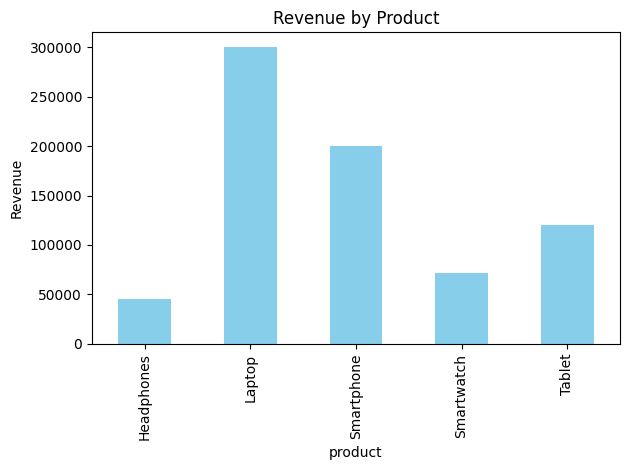

In [6]:
# Displaying Results 
print("Sales Summary:\n", df)

# Bar Chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()

conn.close()